# Problem Statement:
The dataset is a power plant database where the Goal is to predict two prediction one with primary fuel & second capacity_mw where primary_fuel is multiclass variable & capacity_mw is continous.

1.Classification Problem with Primary_fuel.
2.Regression problem with capacity_mw.

# Importing Libraries

In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

- Importing Neccessary libraries for model preparation -Numpy, Pandas, Matplotlib & Seaborn for plots
- 4 ML algo used from  sklearn library at once - SVC,Random Forest Classifier, Decision tree classifier, KNN
- As the metrics is common for all classification problems so imported common metrics all at once.
- (Confusion Metrics, Accuracy Score, Classification Report) from Sklearn metrics module

In [328]:
power_plant = pd.read_csv('power_plant.csv')

In [329]:
df = pd.DataFrame(power_plant)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [330]:
df.shape

(908, 25)

- dataset has 908 rows & 25 Cols

In [331]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

- most of the variables having missing values.
- most of the variables will be dropped as there is not much data avaliable on these variables.

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

- There are 13 float variables & no int variables.
- There are 12 Object variables.

In [333]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

- variable name is not having any space and other special character.

In [334]:
df.drop(['country','country_long','other_fuel1','other_fuel2','other_fuel3','url','owner','wepp_id','estimated_generation_gwh','year_of_capacity_data','generation_data_source'],axis=1,inplace=True)

- above variables are dropped as there is hughe missing values present and no data available for analysis.

In [335]:
df.shape

(908, 14)

- now there are 14 cols & 908 rows

In [336]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 908 non-null    object 
 1   gppd_idnr            908 non-null    object 
 2   capacity_mw          908 non-null    float64
 3   latitude             862 non-null    float64
 4   longitude            862 non-null    float64
 5   primary_fuel         908 non-null    object 
 6   commissioning_year   528 non-null    float64
 7   source               908 non-null    object 
 8   geolocation_source   889 non-null    object 
 9   generation_gwh_2013  384 non-null    float64
 10  generation_gwh_2014  401 non-null    float64
 11  generation_gwh_2015  425 non-null    float64
 12  generation_gwh_2016  437 non-null    float64
 13  generation_gwh_2017  443 non-null    float64
dtypes: float64(9), object(5)
memory usage: 99.4+ KB


- Now the dataframe has 9 float variables & 5 objects variables.

In [338]:
numerics = ['float64', 'int64']
numeric_ds = df.select_dtypes(include=numerics)
objects_ds = df.select_dtypes(exclude=numerics)

- dataset is separated with object & numeric col for better EDA

In [340]:
objects_ds.head()

,name,gppd_idnr,primary_fuel,source,geolocation_source
0,ACME Solar Tower,WRI1020239,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,ADITYA CEMENT WORKS,WRI1019881,Coal,Ultratech Cement ltd,WRI
2,AES Saurashtra Windfarms,WRI1026669,Wind,CDM,WRI
3,AGARTALA GT,IND0000001,Gas,Central Electricity Authority,WRI
4,AKALTARA TPP,IND0000002,Coal,Central Electricity Authority,WRI


In [341]:
objects_ds.describe()

,name,gppd_idnr,primary_fuel,source,geolocation_source
count,908,908,908,908,889
unique,908,908,8,191,3
top,DULHASTI,IND0000518,Coal,Central Electricity Authority,WRI
freq,1,1,259,520,766


- geolocation source has missing value as the no of count is 889 which is not equal to 908.
- source col has 191 unique class with Central Electric Authority is the highest.
- primary fuel has 8 unique class with coal has the highest freq count of 259.
- similar obs can be drawn for others cols.

In [342]:
numeric_ds.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


- capacity_mw mean is greater then 50% percentile also std is very high.
- capacity_mw there is hughe diff in max & 75th percentile.
- from generation_gwh_2013 to generation_gwh_2017 there is hughe diff in max & 75th percentile also std is high & mean is > then 50th percentile.


In [343]:
df.groupby('geolocation_source').size()

geolocation_source
Industry About                          119
National Renewable Energy Laboratory      4
WRI                                     766
dtype: int64

- this col has 3 unique class where WRI class is the highest.

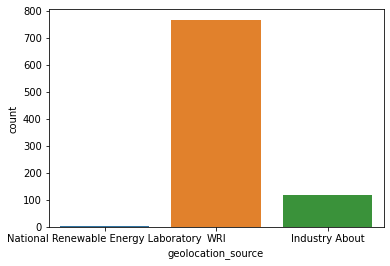

In [344]:
sns.countplot(df['geolocation_source']);

- this col has 3 unique class where WRI class is the highest.

In [345]:
df.groupby('primary_fuel').size()

primary_fuel
Biomass     50
Coal       259
Gas         69
Hydro      250
Nuclear      9
Oil         21
Solar      127
Wind       123
dtype: int64

- Primary fuel has 8 kind of fuel type.
- where nuclear is the least one & Coal is the highest fuel type.

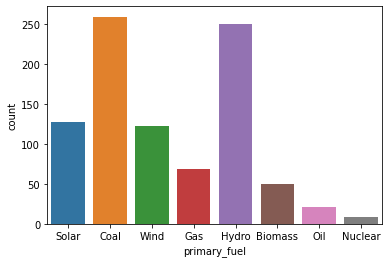

In [346]:
sns.countplot(df['primary_fuel']);

- Primary fuel has 8 kind of fuel type.
- where nuclear is the least one & Coal is the highest fuel type.

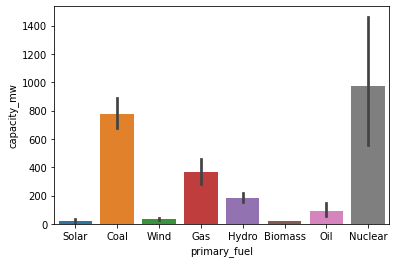

In [347]:
ax = sns.barplot(x='primary_fuel', y= 'capacity_mw' , data=df) 

- Nuclear fuel has the highest capacity_mw as compared with other fuel type.
- And solar fuel type has the least capacity_mw

# Labelencoder 

In [350]:
# categorical variable encoding
cat_vars_list = objects_ds.columns.tolist()
## Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cat_vars_list :
    df[i] = le.fit_transform(df[i])

- all the object col is label encoded and merged with the dataframe for further treatment.

In [351]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,658,2.5,28.1839,73.2407,6,2011.0,109,1,NaN,NaN,NaN,NaN,NaN
1,1,520,98.0,24.7663,74.6090,1,NaN,174,2,NaN,NaN,NaN,NaN,NaN
2,2,854,39.2,21.9038,69.3732,7,NaN,21,2,NaN,NaN,NaN,NaN,NaN
3,3,0,135.0,23.8712,91.3602,2,2004.0,22,2,631.777928,617.789264,843.747,886.004428,663.774500
4,4,1,1800.0,21.9603,82.4091,1,2015.0,22,2,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


- all the objects col is label encoded and there is missing values present will be treated below.

# Removing Missing Value 

In [352]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source       0
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

- the dataset is not clean and has hughe missing values.

In [353]:
df["latitude"] = df["latitude"].fillna(df["latitude"].median())
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2013"] = df["generation_gwh_2013"].fillna(df["generation_gwh_2013"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())

- as the data is not normaly distributed in above variables so missing value is replaced by median.

In [354]:
df.isnull().sum()

name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

- No missing value seen after treatment

# Skewness Detection

#### 1. HistoGram Plot

array([[<AxesSubplot:title={'center':'name'}>,
        <AxesSubplot:title={'center':'gppd_idnr'}>,
        <AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'primary_fuel'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'source'}>],
       [<AxesSubplot:title={'center':'geolocation_source'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

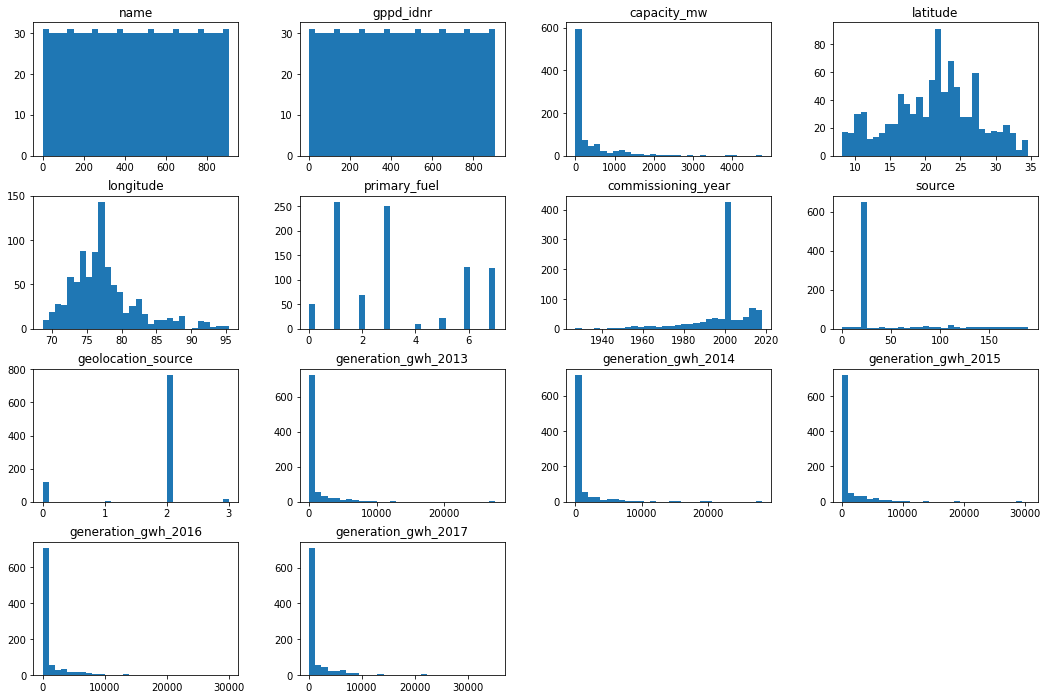

In [355]:
df.hist(grid=False, figsize=(18,12), bins=30)

- capacity_mw has right skewed data and value is high.
- From generation_gwh_2013 till generation_gwh_2017 the data is right skewed and shows positive skewness.
- Sqrt method is applied on these variables below multiple times till the skewness range fall in normal range.

#### 2. Disstplot

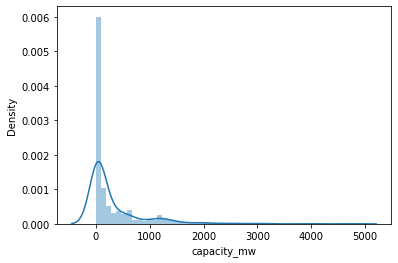

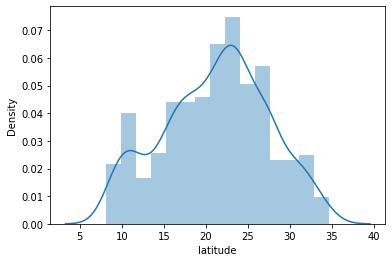

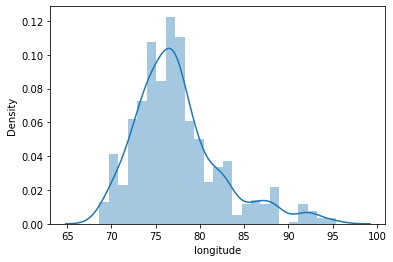

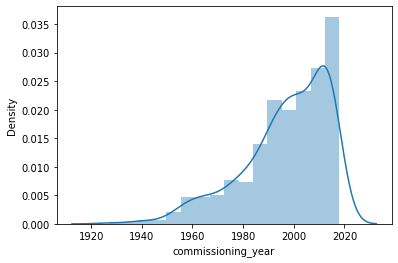

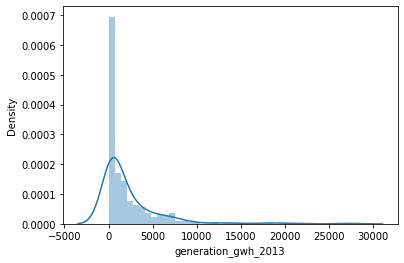

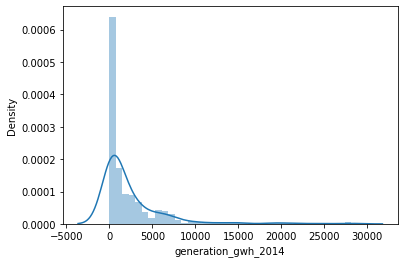

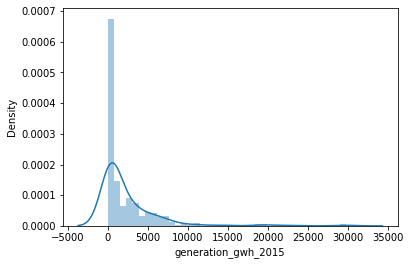

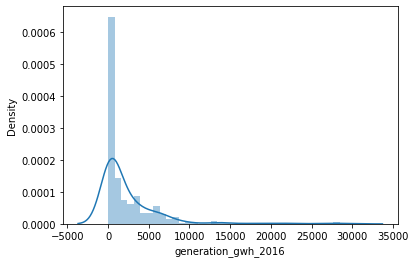

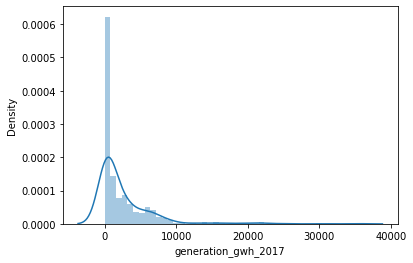

In [356]:
for i in numeric_ds:
    plt.figure()
    sns.distplot(numeric_ds[i])

- capacity_mw has right skewed data and value is high.
- From generation_gwh_2013 till generation_gwh_2017 the data is right skewed and shows positive skewness.
- Sqrt method is applied on these variables below multiple times till the skewness range fall in normal range.

<AxesSubplot:>

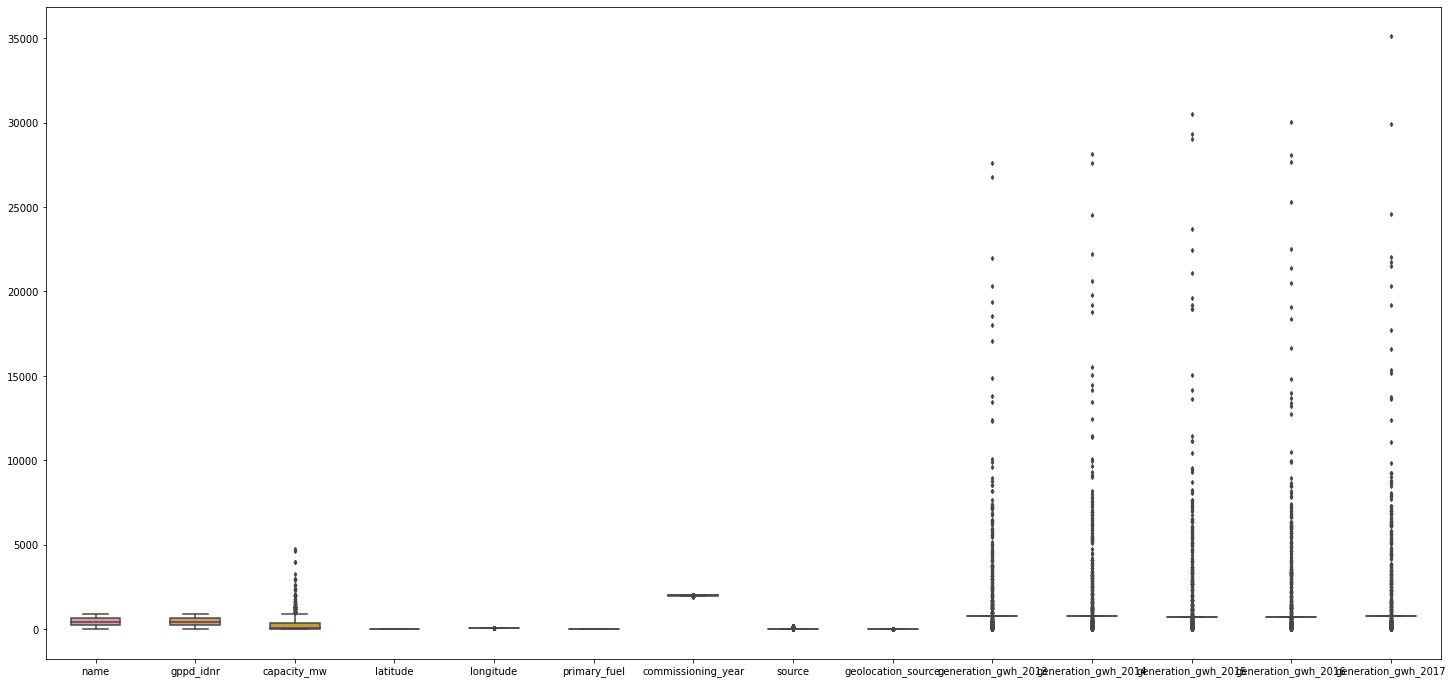

In [357]:
fig, ax =plt.subplots(figsize=(25,12))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

- capacity_mw has hugheourliers which also act as target col in regression problem later.
- from generation_gwh_2013 till generation_gwh_2017 there is hughe outliers present in these variables.

## Correlation

In [358]:
dfcor=df.corr()
dfcor

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
name,1.000000,0.336792,0.059870,-0.133026,0.017599,0.038752,-0.042559,-0.013801,0.045242,0.079328,0.082761,0.071895,0.065368,0.069395
gppd_idnr,0.336792,1.000000,-0.334308,-0.105275,-0.381087,0.607373,0.140865,0.416575,-0.410407,-0.155146,-0.160279,-0.176156,-0.187756,-0.183912
capacity_mw,0.059870,-0.334308,1.000000,0.047608,0.200473,-0.377783,0.215667,-0.241701,0.183286,0.756523,0.804581,0.830400,0.863989,0.877058
latitude,-0.133026,-0.105275,0.047608,1.000000,0.030775,-0.010793,0.084220,0.054346,-0.173347,0.053106,0.057527,0.052797,0.046684,0.056430
longitude,0.017599,-0.381087,0.200473,0.030775,1.000000,-0.352749,0.035731,-0.236349,0.236711,0.102637,0.107967,0.125723,0.148405,0.156255
primary_fuel,0.038752,0.607373,-0.377783,-0.010793,-0.352749,1.000000,-0.065716,0.053609,-0.419911,-0.228761,-0.240407,-0.249826,-0.260900,-0.263818
commissioning_year,-0.042559,0.140865,0.215667,0.084220,0.035731,-0.065716,1.000000,0.085523,-0.048154,0.052258,0.086131,0.118738,0.151269,0.164514
source,-0.013801,0.416575,-0.241701,0.054346,-0.236349,0.053609,0.085523,1.000000,-0.492075,-0.121131,-0.125425,-0.131500,-0.136135,-0.135138
geolocation_source,0.045242,-0.410407,0.183286,-0.173347,0.236711,-0.419911,-0.048154,-0.492075,1.000000,0.086918,0.090000,0.094359,0.097685,0.096969
generation_gwh_2013,0.079328,-0.155146,0.756523,0.053106,0.102637,-0.228761,0.052258,-0.121131,0.086918,1.000000,0.970385,0.907385,0.878836,0.839297


- From generation_gwh_2013 till generation_gwh_2017 shows high +ve corr with each others.
- Target col primary fuel has only +ve corr with gppd_idnr and almost -ve corr with others.
- capacity_mw shows high +ve corr with generation_gwh_2013 till generation_gwh_2017.
- as there is huge corr i will use PCA to handle corr & multicollinearity issue with these variables.

## Heatmap

<AxesSubplot:>

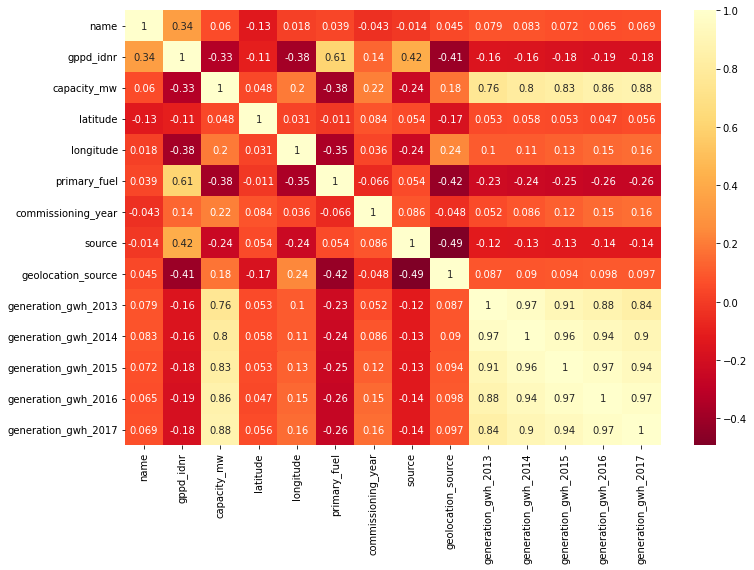

In [359]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='YlOrRd_r', annot=True)

- From generation_gwh_2013 till generation_gwh_2017 shows high +ve corr with each others.
- Target col primary fuel has only +ve corr with gppd_idnr and almost -ve corr with others.
- capacity_mw shows high +ve corr with generation_gwh_2013 till generation_gwh_2017.
- as there is huge corr i will use PCA to handle corr & multicollinearity issue with these variables.

# VIF:Multicollinearity

In [360]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [361]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

In [362]:
vif_calc()

    VIF Factor             features
0     5.264109                 name
1    11.413924            gppd_idnr
2     7.134826          capacity_mw
3    14.367400             latitude
4   333.684293            longitude
5     7.004779         primary_fuel
6   413.270280   commissioning_year
7     3.723723               source
8    12.761033   geolocation_source
9    29.030045  generation_gwh_2013
10   70.700471  generation_gwh_2014
11   47.583929  generation_gwh_2015
12   57.657141  generation_gwh_2016
13   30.338385  generation_gwh_2017


- From generation_gwh_2013 till generation_gwh_2017 shows high +ve corr & multicollinearity with each others.
- Target col primary fuel has only +ve corr with gppd_idnr and almost -ve corr with others.
- capacity_mw shows high +ve corr & multicollinearity with generation_gwh_2013 till generation_gwh_2017.
- as there is huge corr i will use PCA to handle corr & multicollinearity issue with these variables.

# Z-Score Removing Outliers

In [363]:
#detecting outliers
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([ 15,  15,  15,  15,  72,  81, 144, 144, 144, 144, 144, 144, 159,
       159, 180, 184, 192, 210, 210, 210, 210, 210, 210, 222, 240, 245,
       300, 309, 309, 309, 309, 309, 309, 322, 324, 334, 341, 343, 346,
       361, 364, 365, 365, 365, 365, 365, 365, 372, 376, 389, 417, 428,
       445, 455, 479, 483, 485, 494, 494, 494, 494, 494, 494, 495, 495,
       495, 495, 495, 495, 500, 520, 530, 533, 533, 539, 542, 547, 575,
       584, 593, 602, 622, 624, 639, 649, 649, 649, 649, 649, 649, 658,
       658, 658, 658, 658, 658, 662, 670, 690, 696, 696, 696, 696, 696,
       707, 710, 722, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727,
       727, 727, 727, 727, 727, 729, 787, 787, 787, 787, 787, 787, 789,
       808, 809, 809, 809, 809, 809, 809, 819, 833, 848, 849, 849, 871,
       872, 880, 881, 881, 881, 881, 881, 881, 896, 901], dtype=int64), array([ 2, 11, 12, 13,  7,  7,  2,  9, 10, 11, 12, 13,  9, 10,  4,  4,  7,
        2,  9, 10, 11, 12, 13,  6,  4,  4,  7,  2,  9, 10, 1

In [364]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df=dfnew

dfnew.shape= (833, 14)


- All the outliers whose value greater then 3 std is removed from dataset
- the number of rows is rfeduced to 833 rows from 908 rows as can be seen above.

In [365]:
Data_loss=((908-833)/908)*100

-%age data loss computation

In [366]:
Data_loss

8.259911894273127

- The %age data loss is 8.2%, but the there are mor outliers in dataset.
- I am not removing more outliers as these outliers is averaged by tree based algorithm.

In [367]:
x=df.drop("primary_fuel",axis=1) # Independent var
y=df["primary_fuel"] # target col

x- independent variables without target col & Y-depedndent variable primary_fuel.

In [368]:
x.shape

(833, 13)

- x shows 833 rows & 13 cols without target col

In [369]:
y.shape

(833,)

- y also has 833 rows.

# Removing Skewness

In [370]:
df.skew()

name                   0.023554
gppd_idnr             -0.056924
capacity_mw            1.961847
latitude              -0.126512
longitude              0.883761
primary_fuel           0.409668
commissioning_year    -1.199857
source                 1.782665
geolocation_source    -1.854449
generation_gwh_2013    3.058127
generation_gwh_2014    2.910898
generation_gwh_2015    2.699657
generation_gwh_2016    2.645103
generation_gwh_2017    2.540739
dtype: float64

- capacity_mw has right skewed data and value is high.
- From generation_gwh_2013 till generation_gwh_2017 the data is right skewed and shows positive skewness.
- Sqrt method is applied on these variables below multiple times till the skewness range fall in normal range.

name                   0.023554
gppd_idnr             -0.056924
capacity_mw            1.961847
latitude              -0.126512
longitude              0.883761
primary_fuel           0.409668
commissioning_year    -1.199857
source                 1.782665
geolocation_source    -1.854449
generation_gwh_2013    1.569897
generation_gwh_2014    2.910898
generation_gwh_2015    2.699657
generation_gwh_2016    2.645103
generation_gwh_2017    2.540739
dtype: float64

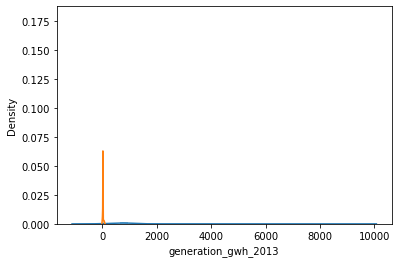

In [371]:
import numpy as np
sns.distplot(df['generation_gwh_2013'])
df['generation_gwh_2013']=np.sqrt(df['generation_gwh_2013'])
sns.distplot(df['generation_gwh_2013'])
df.skew()

name                   0.023554
gppd_idnr             -0.056924
capacity_mw            1.961847
latitude              -0.126512
longitude              0.883761
primary_fuel           0.409668
commissioning_year    -1.199857
source                 1.782665
geolocation_source    -1.854449
generation_gwh_2013   -0.565663
generation_gwh_2014    2.910898
generation_gwh_2015    2.699657
generation_gwh_2016    2.645103
generation_gwh_2017    2.540739
dtype: float64

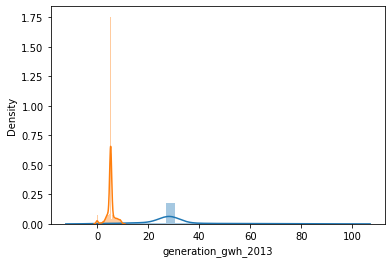

In [372]:
import numpy as np
sns.distplot(df['generation_gwh_2013'])
df['generation_gwh_2013']=np.sqrt(df['generation_gwh_2013'])
sns.distplot(df['generation_gwh_2013'])
df.skew()

name                   0.023554
gppd_idnr             -0.056924
capacity_mw            1.961847
latitude              -0.126512
longitude              0.883761
primary_fuel           0.409668
commissioning_year    -1.199857
source                 1.782665
geolocation_source    -1.854449
generation_gwh_2013   -0.565663
generation_gwh_2014    1.459260
generation_gwh_2015    2.699657
generation_gwh_2016    2.645103
generation_gwh_2017    2.540739
dtype: float64

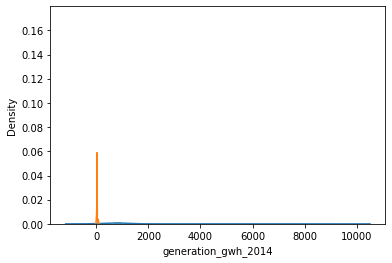

In [373]:
import numpy as np
sns.distplot(df['generation_gwh_2014'])
df['generation_gwh_2014']=np.sqrt(df['generation_gwh_2014'])
sns.distplot(df['generation_gwh_2014'])
df.skew()

name                   0.023554
gppd_idnr             -0.056924
capacity_mw            1.961847
latitude              -0.126512
longitude              0.883761
primary_fuel           0.409668
commissioning_year    -1.199857
source                 1.782665
geolocation_source    -1.854449
generation_gwh_2013   -0.565663
generation_gwh_2014   -0.655854
generation_gwh_2015    2.699657
generation_gwh_2016    2.645103
generation_gwh_2017    2.540739
dtype: float64

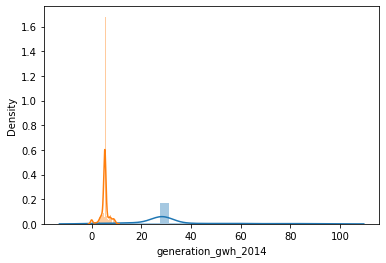

In [374]:
import numpy as np
sns.distplot(df['generation_gwh_2014'])
df['generation_gwh_2014']=np.sqrt(df['generation_gwh_2014'])
sns.distplot(df['generation_gwh_2014'])
df.skew()

name                   0.023554
gppd_idnr             -0.056924
capacity_mw            1.961847
latitude              -0.126512
longitude              0.883761
primary_fuel           0.409668
commissioning_year    -1.199857
source                 1.782665
geolocation_source    -1.854449
generation_gwh_2013   -0.565663
generation_gwh_2014   -0.655854
generation_gwh_2015    1.440761
generation_gwh_2016    2.645103
generation_gwh_2017    2.540739
dtype: float64

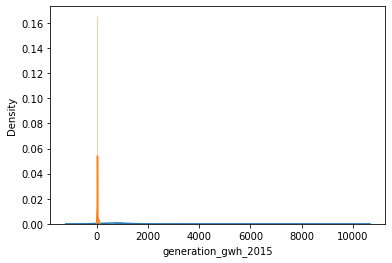

In [375]:
import numpy as np
sns.distplot(df['generation_gwh_2015'])
df['generation_gwh_2015']=np.sqrt(df['generation_gwh_2015'])
sns.distplot(df['generation_gwh_2015'])
df.skew()

name                   0.023554
gppd_idnr             -0.056924
capacity_mw            1.961847
latitude              -0.126512
longitude              0.883761
primary_fuel           0.409668
commissioning_year    -1.199857
source                 1.782665
geolocation_source    -1.854449
generation_gwh_2013   -0.565663
generation_gwh_2014   -0.655854
generation_gwh_2015   -0.392194
generation_gwh_2016    2.645103
generation_gwh_2017    2.540739
dtype: float64

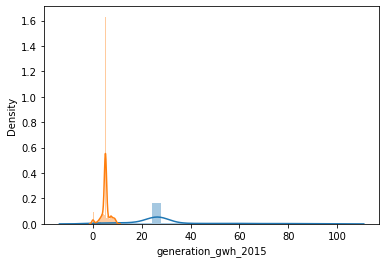

In [376]:
import numpy as np
sns.distplot(df['generation_gwh_2015'])
df['generation_gwh_2015']=np.sqrt(df['generation_gwh_2015'])
sns.distplot(df['generation_gwh_2015'])
df.skew()

name                   0.023554
gppd_idnr             -0.056924
capacity_mw            1.961847
latitude              -0.126512
longitude              0.883761
primary_fuel           0.409668
commissioning_year    -1.199857
source                 1.782665
geolocation_source    -1.854449
generation_gwh_2013   -0.565663
generation_gwh_2014   -0.655854
generation_gwh_2015   -0.392194
generation_gwh_2016    1.412701
generation_gwh_2017    2.540739
dtype: float64

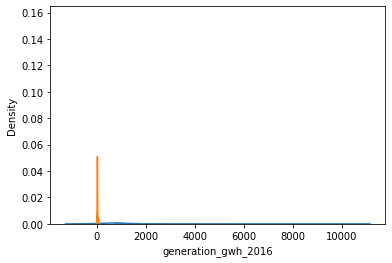

In [377]:
import numpy as np
sns.distplot(df['generation_gwh_2016'])
df['generation_gwh_2016']=np.sqrt(df['generation_gwh_2016'])
sns.distplot(df['generation_gwh_2016'])
df.skew()

name                   0.023554
gppd_idnr             -0.056924
capacity_mw            1.961847
latitude              -0.126512
longitude              0.883761
primary_fuel           0.409668
commissioning_year    -1.199857
source                 1.782665
geolocation_source    -1.854449
generation_gwh_2013   -0.565663
generation_gwh_2014   -0.655854
generation_gwh_2015   -0.392194
generation_gwh_2016   -0.389252
generation_gwh_2017    2.540739
dtype: float64

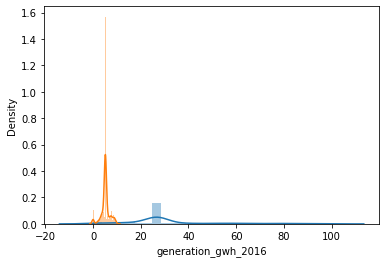

In [378]:
import numpy as np
sns.distplot(df['generation_gwh_2016'])
df['generation_gwh_2016']=np.sqrt(df['generation_gwh_2016'])
sns.distplot(df['generation_gwh_2016'])
df.skew()

name                   0.023554
gppd_idnr             -0.056924
capacity_mw            1.961847
latitude              -0.126512
longitude              0.883761
primary_fuel           0.409668
commissioning_year    -1.199857
source                 1.782665
geolocation_source    -1.854449
generation_gwh_2013   -0.565663
generation_gwh_2014   -0.655854
generation_gwh_2015   -0.392194
generation_gwh_2016   -0.389252
generation_gwh_2017    1.277419
dtype: float64

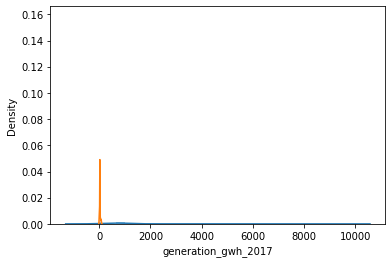

In [379]:
import numpy as np
sns.distplot(df['generation_gwh_2017'])
df['generation_gwh_2017']=np.sqrt(df['generation_gwh_2017'])
sns.distplot(df['generation_gwh_2017'])
df.skew()

name                   0.023554
gppd_idnr             -0.056924
capacity_mw            1.961847
latitude              -0.126512
longitude              0.883761
primary_fuel           0.409668
commissioning_year    -1.199857
source                 1.782665
geolocation_source    -1.854449
generation_gwh_2013   -0.565663
generation_gwh_2014   -0.655854
generation_gwh_2015   -0.392194
generation_gwh_2016   -0.389252
generation_gwh_2017   -0.525993
dtype: float64

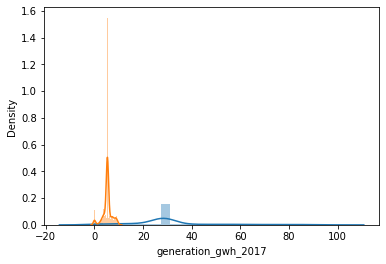

In [380]:
import numpy as np
sns.distplot(df['generation_gwh_2017'])
df['generation_gwh_2017']=np.sqrt(df['generation_gwh_2017'])
sns.distplot(df['generation_gwh_2017'])
df.skew()

name                   0.023554
gppd_idnr             -0.056924
capacity_mw            1.132682
latitude              -0.126512
longitude              0.883761
primary_fuel           0.409668
commissioning_year    -1.199857
source                 1.782665
geolocation_source    -1.854449
generation_gwh_2013   -0.565663
generation_gwh_2014   -0.655854
generation_gwh_2015   -0.392194
generation_gwh_2016   -0.389252
generation_gwh_2017   -0.525993
dtype: float64

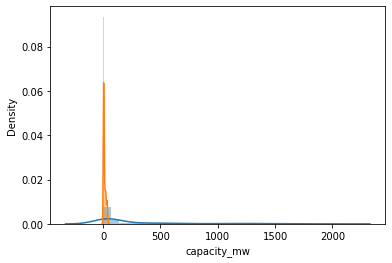

In [381]:
import numpy as np
sns.distplot(df['capacity_mw'])
df['capacity_mw']=np.sqrt(df['capacity_mw'])
sns.distplot(df['capacity_mw'])
df.skew()

name                   0.023554
gppd_idnr             -0.056924
capacity_mw            0.607195
latitude              -0.126512
longitude              0.883761
primary_fuel           0.409668
commissioning_year    -1.199857
source                 1.782665
geolocation_source    -1.854449
generation_gwh_2013   -0.565663
generation_gwh_2014   -0.655854
generation_gwh_2015   -0.392194
generation_gwh_2016   -0.389252
generation_gwh_2017   -0.525993
dtype: float64

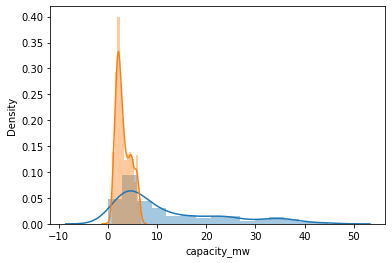

In [382]:
import numpy as np
sns.distplot(df['capacity_mw'])
df['capacity_mw']=np.sqrt(df['capacity_mw'])
sns.distplot(df['capacity_mw'])
df.skew()

- Multiple time sqrt method is applied on above variables to remove right & poistive skewness on above variables.
- And finaly values are falling within -0.5 to 0.5 of normal range.
- Categorical Variable is not treated for skewness.

# Scaling

In [383]:
from sklearn.preprocessing import StandardScaler

In [384]:
scaling = StandardScaler()
x=scaling.fit_transform(x)
x

array([[-1.69541583,  0.74074017, -0.63883134, ..., -0.31046903,
        -0.31741184, -0.30736888],
       [-1.69162619,  0.22179861, -0.41091893, ..., -0.31046903,
        -0.31741184, -0.30736888],
       [-1.68783655,  1.47778761, -0.55124615, ..., -0.31046903,
        -0.31741184, -0.30736888],
       ...,
       [ 1.73420846,  1.62068456, -0.58394144, ..., -0.31046903,
        -0.31741184, -0.30736888],
       [ 1.7379981 ,  0.29700753, -0.45387624, ..., -0.31046903,
        -0.31741184, -0.30736888],
       [ 1.74178774,  1.56427787, -0.6054201 , ..., -0.31046903,
        -0.31741184, -0.30736888]])

- Making the data in same range with standard scaler.
- Also data should be scaled before PCA.

# PCA:Dimension reduction 

In [385]:
from sklearn.decomposition import PCA # Importing PCA from decomposition module.
pca = PCA(n_components=10) # setting 10 pca components
x = pca.fit_transform(x) # applying pca on x-independent variables.

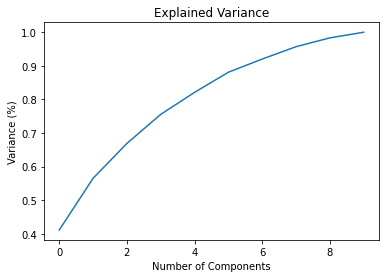

In [386]:
import matplotlib.pyplot as plt
import seaborn as sna
pca = PCA()
principalComponents = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()


- As we can see 8 PCA component clearly explains the presence of variance with these PCA.

In [387]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x)
principal_x = pd.DataFrame(new_data,columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])

- So we are using 8 pca and applying new 8 pca to x independent variables again.
- Creating pca dataframe of 8 pca components.

In [388]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,-1.272892,1.911640,-2.150807,-0.403058,-0.546741,-0.473704,0.653303,0.022680
1,-1.201783,1.362832,-1.810912,0.222554,-1.167140,0.373029,1.592297,-1.744408
2,-1.188297,0.577578,-0.491075,0.625670,-0.813340,-2.104556,0.411826,0.698804
3,0.111236,-2.759373,-2.071134,-1.163237,-0.116305,2.070873,0.671226,0.872303
4,6.076922,-0.728012,-1.874538,-1.449964,-1.385104,-0.002545,-1.272187,-0.649052
...,...,...,...,...,...,...,...,...
828,0.506203,-0.528606,1.472416,-2.168399,0.290350,-0.527224,-1.320279,-0.862768
829,-1.395207,2.123814,1.645642,-0.578123,-0.181378,1.588710,-1.064440,0.820998
830,-1.024835,0.418243,2.413626,-0.466506,0.398281,-0.412430,0.044479,0.368164
831,-0.870520,0.559262,1.005612,-0.162260,1.231371,-0.440738,0.154033,-0.874782


- principal_x is the PCA treated independent variables.
- the purpose of using PCA in this dataset is  because there is hughe outliers & many variables shows corr & multicollinearity.

In [389]:
x = principal_x

- x is remapped to principal_x

In [390]:
x.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,-1.272892,1.911640,-2.150807,-0.403058,-0.546741,-0.473704,0.653303,0.022680
1,-1.201783,1.362832,-1.810912,0.222554,-1.167140,0.373029,1.592297,-1.744408
2,-1.188297,0.577578,-0.491075,0.625670,-0.813340,-2.104556,0.411826,0.698804
3,0.111236,-2.759373,-2.071134,-1.163237,-0.116305,2.070873,0.671226,0.872303
4,6.076922,-0.728012,-1.874538,-1.449964,-1.385104,-0.002545,-1.272187,-0.649052


- Now x is the treated pca indpendent variables.

In [391]:
x.shape

(833, 8)

In [ ]:
- xhas 833 rows and new 8 PCA col

In [392]:
y.shape

(833,)

- y is the target col primary fuel having 833 rows.

In [393]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i) 

65.86826347305389 at random_state 0
70.05988023952095 at random_state 1
68.8622754491018 at random_state 2
68.8622754491018 at random_state 3
72.45508982035929 at random_state 4
71.25748502994011 at random_state 5
76.64670658682635 at random_state 6
74.25149700598801 at random_state 7
71.25748502994011 at random_state 8
72.45508982035929 at random_state 9
76.64670658682635 at random_state 10
77.84431137724552 at random_state 11
73.05389221556887 at random_state 12
73.05389221556887 at random_state 13
68.8622754491018 at random_state 14
71.25748502994011 at random_state 15
73.65269461077844 at random_state 16
73.65269461077844 at random_state 17
66.46706586826348 at random_state 18
65.86826347305389 at random_state 19
70.65868263473054 at random_state 20
68.8622754491018 at random_state 21
75.44910179640718 at random_state 22
64.67065868263472 at random_state 23
70.05988023952095 at random_state 24
71.8562874251497 at random_state 25
78.44311377245509 at random_state 26
68.2634730538922

- Obs DTC is set for 200 random state out of which best random state will be selected.

In [394]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu," on Random_state ",maxRS)

Best accuracy is  0.748  on Random_state  14


-Obs : Above code is used to select best random sate out of 200 random state which is 14 with accuracy of 74.80%

In [395]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 14)

- 70% data used to train the model
- 30% data used to test & predict the model on test data.
- Best random state used is 14

# Decisiontree Classifier

In [396]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.71      0.45      0.56        11
           1       0.73      0.76      0.74        70
           2       0.21      0.29      0.24        17
           3       0.81      0.71      0.76        66
           4       0.00      0.00      0.00         2
           5       0.40      0.22      0.29         9
           6       1.00      1.00      1.00        38
           7       0.90      0.97      0.94        37

    accuracy                           0.74       250
   macro avg       0.59      0.55      0.56       250
weighted avg       0.76      0.74      0.75       250



- DTC acc = 74%

# Randomforest Classifier

In [397]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.79      0.86      0.82        70
           2       0.62      0.29      0.40        17
           3       0.77      0.88      0.82        66
           4       0.00      0.00      0.00         2
           5       0.50      0.11      0.18         9
           6       1.00      1.00      1.00        38
           7       0.93      1.00      0.96        37

    accuracy                           0.83       250
   macro avg       0.67      0.61      0.61       250
weighted avg       0.81      0.83      0.81       250



- RFC acc = 83%

# Support Vector Classifier

In [398]:
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.77      0.84      0.80        70
           2       0.00      0.00      0.00        17
           3       0.72      0.89      0.80        66
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         9
           6       1.00      0.95      0.97        38
           7       0.93      1.00      0.96        37

    accuracy                           0.80       250
   macro avg       0.50      0.55      0.53       250
weighted avg       0.72      0.80      0.75       250



- SVC acc = 80%

# KNN Classifier

In [399]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.77      0.84      0.80        70
           2       0.00      0.00      0.00        17
           3       0.72      0.89      0.80        66
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         9
           6       1.00      0.95      0.97        38
           7       0.93      1.00      0.96        37

    accuracy                           0.80       250
   macro avg       0.50      0.55      0.53       250
weighted avg       0.72      0.80      0.75       250



- Knn acc = 80%

# K-Fold Cross validation

In [400]:
from sklearn.model_selection import cross_val_score  # Importing cross val score
from sklearn.model_selection import KFold  # Imporing Kfold CV

In [401]:
cross_validation=KFold(5, shuffle =True) 
# Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [402]:
print(cross_val_score(DTC,x,y,cv=cross_validation).mean()) # Decision Tree Classifier CV o/p

0.7046172714811341


In [403]:
print(cross_val_score(RFC,x,y,cv=cross_validation).mean()) # Random Forest Classifier CV o/p

0.8126830675997404


In [404]:
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) # Support vector Regressor  CV o/p

0.7646706586826347


In [405]:
print(cross_val_score(knn,x,y,cv=cross_validation).mean()) # knn classifier  CV o/p

0.7610850587980665


# Best Model 

- The best model is RFC as the RFC acc - RFC CV score diff is least which 83-81.2 =1.8

# GridSearch CV & Hyperparameter Tuning.

In [411]:
from sklearn.model_selection import GridSearchCV # Importing Gridsearch CV from sklearn

In [416]:
import numpy as np
parameter = {'max_depth' : np.arange(2,8),
            'criterion':['gini','entropy'],
            'n_estimators' : [100],
            'max_features' : ['auto','sqrt','log2']}

- RFC Hyperparameter is set with multiple values to select the best one through GridsearchCV

In [417]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=cross_validation)

-Obs : Applying Gridsearch to best model random forest classifier 

In [418]:
GCV.fit(x_train,y_train)
# Grid search CV applied to the Training Dataset 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

- Grid search CV applied to the Training Dataset 

In [419]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 100}

- Best Parameter is selected from grid search CV which is 
- (criterion = 'gini', max_depth = 7,max_features='auto',n_estimators= 100)

# Best Model is RFC 

In [420]:
Final_mod = RandomForestClassifier(criterion = 'gini', max_depth = 7,max_features='auto',n_estimators= 100)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

80.4


In [ ]:
-Obs :  Final Accuracy of the best model = 80.4

# Importing Roc Curve & Ruc Curve Score

In [421]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# AUC-ROC Curve

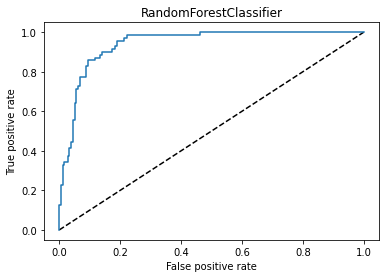

In [422]:
y_pred_prob= Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob,pos_label= 1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

ObS : ROC Curve : Classifiers that give curves closer to top left corner indicates that model will give better performance & if the
curve comming closer to 45 degree diagonal of the ROC space the less accurate the model will be, so in above case the curve is 
closer to top left corner hence I believe the model will give better performance.

# II.Regression:
The dataset is a power plant database where the Goal is to predict two prediction one with primary fuel & second capacity_mw where primary_fuel is multiclass variable & capacity_mw is continous.

1.Classification Problem with Primary_fuel.
2.Regression problem with capacity_mw.

In [423]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost 
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Obs :

-Imporing Necessaries libraries: Numpy, pandas, matplotlib & seaborn.

-Importing 5 Machine learning Algorrithm : Linear Regression, Decision Tree Regressor,Randomforest regressor, SVM reg, XGB reg.

-Importing Common Regression Metrics Mean Absolute error, Mean Squared error.

-Importing r2 score.

-Importing Label encoder libraries as well as standard scaler libraries.

In [424]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,658,1.257433,28.1839,73.2407,6,2011.0,109,1,5.313409,5.327843,5.145573,5.174146,5.330885
1,1,520,3.146346,24.7663,74.6090,1,2000.0,174,2,5.313409,5.327843,5.145573,5.174146,5.330885
2,2,854,2.502197,21.9038,69.3732,7,2000.0,21,2,5.313409,5.327843,5.145573,5.174146,5.330885
3,3,0,3.408658,23.8712,91.3602,2,2004.0,22,2,5.013501,4.985516,5.389557,5.455807,5.075807
4,4,1,6.513556,21.9603,82.4091,1,2015.0,22,2,6.390986,7.422656,8.770288,8.888906,8.566593


- The dataframe is the labelencoded where object variable is labelencoded.

In [425]:
x=df.drop("capacity_mw",axis=1)
y=df["capacity_mw"]

- x is the independent variables where the target var-capacity_mw is dropped.
- y is the dependent var-capacity_mw

In [426]:
x.shape

(833, 13)

-x has 833 rows & 13 cols. without target var

In [427]:
y.shape

(833,)

- y also has same rows of 833.

In [428]:
x.head()

,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,658,28.1839,73.2407,6,2011.0,109,1,5.313409,5.327843,5.145573,5.174146,5.330885
1,1,520,24.7663,74.6090,1,2000.0,174,2,5.313409,5.327843,5.145573,5.174146,5.330885
2,2,854,21.9038,69.3732,7,2000.0,21,2,5.313409,5.327843,5.145573,5.174146,5.330885
3,3,0,23.8712,91.3602,2,2004.0,22,2,5.013501,4.985516,5.389557,5.455807,5.075807
4,4,1,21.9603,82.4091,1,2015.0,22,2,6.390986,7.422656,8.770288,8.888906,8.566593


- x datadframe without target var

In [429]:
y.head()

0    1.257433
1    3.146346
2    2.502197
3    3.408658
4    6.513556
Name: capacity_mw, dtype: float64

- y- top 5 values

In [430]:
x.skew()

name                   0.023554
gppd_idnr             -0.056924
latitude              -0.126512
longitude              0.883761
primary_fuel           0.409668
commissioning_year    -1.199857
source                 1.782665
geolocation_source    -1.854449
generation_gwh_2013   -0.565663
generation_gwh_2014   -0.655854
generation_gwh_2015   -0.392194
generation_gwh_2016   -0.389252
generation_gwh_2017   -0.525993
dtype: float64

- As the skewness is already treated in EDA above so no skewness is seen.

In [431]:
scale=StandardScaler() # Standard scaler instance
x=scale.fit_transform(x) # applied to independent variables
x

array([[-1.69541583,  0.74074017,  1.14669608, ..., -0.01265974,
        -0.01631627,  0.01505264],
       [-1.69162619,  0.22179861,  0.59012054, ..., -0.01265974,
        -0.01631627,  0.01505264],
       [-1.68783655,  1.47778761,  0.12394619, ..., -0.01265974,
        -0.01631627,  0.01505264],
       ...,
       [ 1.73420846,  1.62068456, -0.9554612 , ..., -0.01265974,
        -0.01631627,  0.01505264],
       [ 1.7379981 ,  0.29700753,  0.52232373, ..., -0.01265974,
        -0.01631627,  0.01505264],
       [ 1.74178774,  1.56427787, -1.82533847, ..., -0.01265974,
        -0.01631627,  0.01505264]])

- x is scaled for making the data in same range also for PCA data should be scaled.

In [432]:
from sklearn.decomposition import PCA# Importing PCA from decomposition module.
pca = PCA(n_components=10)# setting 10 pca components
x = pca.fit_transform(x)# applying pca on x-independent variables.

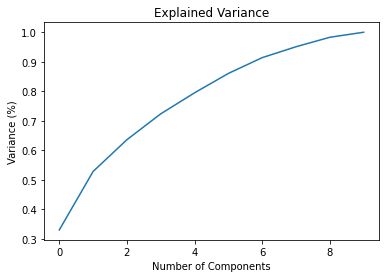

In [433]:
import matplotlib.pyplot as plt
import seaborn as sna
pca = PCA()
principalComponents = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

- As we can see 8 PCA component clearly explains the presence of variance with these PCA.

In [434]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x)
principal_x = pd.DataFrame(new_data,columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])

- So we are using 8 pca and applying new 8 pca to x independent variables again.
- Creating pca dataframe of 8 pca components.

In [435]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,0.103753,2.221910,-2.260551,-0.119584,-0.507378,-0.805900,-0.077702,-0.414210
1,-0.052882,0.755305,-2.283571,-0.124799,1.938029,-0.693604,-1.263124,-0.422717
2,0.312157,1.664911,-0.126587,1.269398,-1.691060,-1.578565,-0.535241,-0.271950
3,-0.225431,-3.001994,-1.697367,-0.637931,-0.014380,-0.129072,2.359707,-0.326754
4,-3.883039,-2.055824,-1.618768,-0.549105,-0.396638,-1.338203,0.601277,0.581089
...,...,...,...,...,...,...,...,...
828,1.203698,-0.676684,1.271423,-2.018977,0.056587,0.296322,-0.712831,-0.419926
829,0.242574,2.680512,1.273862,-1.034983,0.948508,0.324189,1.544030,0.377023
830,0.236828,1.482721,2.511234,-0.470843,-0.823770,0.089748,0.196166,0.021393
831,-0.130376,0.205550,0.645939,-0.679777,0.415685,1.283992,-1.539325,0.146049


- principal_x is the PCA treated independent variables.
- the purpose of using PCA in this dataset is  because there is hughe outliers & many variables shows corr & multicollinearity.

In [436]:
x = principal_x

- x is remapped to principal_x

In [437]:
x.shape

(833, 8)

- Now x is the treated pca indpendent variables.

In [438]:
y.shape

(833,)

- y also has 833 rows

In [439]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred=DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    print(MAE, "at random_state", i)

0.6587293909888675 at random_state 0
0.703986360105471 at random_state 1
0.6223133251954701 at random_state 2
0.7156017050687788 at random_state 3
0.6577754008757578 at random_state 4
0.6449116512352118 at random_state 5
0.6340989905871818 at random_state 6
0.6419726849432535 at random_state 7
0.6396189816300727 at random_state 8
0.6859455766753323 at random_state 9
0.6119605287258835 at random_state 10
0.6981772314930973 at random_state 11
0.6661696383211005 at random_state 12
0.6968593618972491 at random_state 13
0.6425462535706801 at random_state 14
0.6824886990498176 at random_state 15
0.6588049604869484 at random_state 16
0.6334336499736899 at random_state 17
0.6643480975720656 at random_state 18
0.6862131933055812 at random_state 19
0.5972518315862744 at random_state 20
0.7188970045015401 at random_state 21
0.6737710357255943 at random_state 22
0.5574770287310378 at random_state 23
0.61834239058736 at random_state 24
0.6250421448526327 at random_state 25
0.6837974996436222 at ran

- Decisiontree regressor is configured for 200 random state which shows acc for each state.

In [440]:
leastMAE=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred = DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    if MAE>leastMAE:
        leastMAE=MAE
        maxRS=i
print("Least MAE ", leastMAE," on Random_state ",maxRS)

Least MAE  0.7414994500033472  on Random_state  19


- Best Random state selected is 19 with MAE = 0.74

In [441]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 19)

- independent(x) & Target Variable(y) is divided into Train & Test Set.
- 70% data is set for training & 30% data is reserved for testing.
- best Random state is applied which is 19 computed above.

# Linear Regression

In [442]:
lm = LinearRegression() # linear regression instance
lm.fit(x_train,y_train) # applying linear regression on training set to learn the linear relationship.
pred=lm.predict(x_test) # Applying linear Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
lm.score(x_train,y_train) # how well the model learned

Mean Absolute error:  0.8511565054674372
Mean Squared error:  1.2648102544937483
Root Mean Squared Error: 1.1246378325904514
0.4535033443391505


0.6001295543604284

- Score of Linear Reg is 0.60 & MAE = 0.85, R2 Score is 0.45

# Decision Tree Regression

In [443]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
pred = DTR.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
DTR.score(x_train,y_train) # how well the model learned

Mean Absolute error:  0.6973831122439252
Mean Squared error:  1.0543343476355147
Root Mean Squared Error: 1.0268078435790773
0.5444453483168528


1.0

- DTR learned the model with 100%.
- DTR MAE = 0.69
- R2 Score 0.54

# Random Forest Regression

In [444]:
RFR = RandomForestRegressor()  # Random Forest regressor instance
RFR.fit(x_train, y_train) # applying Random Forest regressor on training set to learn relationship.
pred = RFR.predict(x_test) # Applying linear Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
RFR.score(x_train,y_train) # how well the model learned

Mean Absolute error:  0.5348982712820793
Mean Squared error:  0.5459387588950162
Root Mean Squared Error: 0.738876687204987
0.7641118856589442


0.9691543575337618

- RFR MAE = 0.53
- RFR also learned the model well with 96%
- r2 score = 0.76

# Support Vector Regression

In [445]:
SV = SVR() # Support Vector Reg Instance
SV.fit(x_train, y_train) # applying Support Vector Reg on training set to learn  relationship.
pred = SV.predict(x_test) # Applying Support Vector Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
SV.score(x_train,y_train)# how well the model learned

Mean Absolute error:  0.606867349683888
Mean Squared error:  0.7175978713268609
Root Mean Squared Error: 0.8471114869524914
0.6899417636786621


0.810874521592983

- SVC MAE = 0.60
- SVC Learned the model with 81%
- r2 score of SVC  = 0.68

# XGBoost Regression

In [446]:
XGBR = XGBRegressor() # XGBR Instance
XGBR.fit(x_train,y_train) # applying XGBR on training set to learn  relationship.
pred = XGBR.predict(x_test) # Applying XGBR on test data
print('Mean Absolute error: ', mean_absolute_error(y_test,pred))# Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
XGBR.score(x_train,y_train) # how well the model learned    

Mean Absolute error:  0.5580108977671712
Mean Squared error:  0.6118280013198956
Root Mean Squared Error: 0.7821943500945884
0.735642595106239


0.9997557336296715

- XGBR MAE = 0.55
- XGBR learned the model with 73%
- r2 score of XGBR = 0.73

# K-fold Cross Validation

In [447]:
from sklearn.model_selection import cross_val_score  # Obs : Importing cross val score
from sklearn.model_selection import KFold  # Obs : Imporing Kfold CV

In [448]:
cross_validation=KFold(5, shuffle =True)
# Obs : Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [449]:
print(cross_val_score(lm,x,y,cv=cross_validation).mean()) # Obs : Linear Regression CV o/p

0.5459152989716793


In [450]:
print(cross_val_score(DTR,x,y,cv=cross_validation).mean()) # Obs :  DTR Regression CV o/p

0.6280375444123503


In [451]:
print(cross_val_score(RFR,x,y,cv=cross_validation).mean()) # Obs : Random Forest Regressor CV o/p

0.7878751068989751


In [452]:
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) # Obs : Support Vector CV o/p

0.7394424214871991


In [453]:
print(cross_val_score(XGBR,x,y,cv=cross_validation).mean()) # Obs :  XGBoost Regressor CV o/p

0.7644372454905495


# Best Model

- DTR has the least diff from DTR MAE-DTR CV = 0.69 - 0.62 = 0.07, hence i have selected DTR as the best Model.

# Hyperparameter & GridsearchCV

In [455]:
from sklearn.model_selection import GridSearchCV # Obs : importing GridSearchCV

# Setting DTR Hyperparameter

In [457]:
import numpy as np
parameter = {'max_depth': np.arange(2,8),
             'criterion':['squared_error','friedman_mse','absolute_error'],
             'max_features': ['log2','sqrt','auto'],
             'min_samples_leaf': [1,2],
             'splitter': ['best','random']}

- DTR is set with Hyperparameter as above

In [458]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=cross_validation)

- GridsearchCV instance is created with DTR.

In [459]:
GCV.fit(x_train,y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 2],
                         'splitter': ['best', 'random']})

- GVC is applied to training set 

In [460]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'splitter': 'best'}

- The best param is selected (criterion = 'friedman_mse',max_depth=4, max_features = 'auto', min_samples_leaf = 2,splitter= 'best')

In [464]:
Final_mod = DecisionTreeRegressor(criterion = 'friedman_mse',max_depth=4, max_features = 'auto', min_samples_leaf = 2,splitter= 'best')
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
DTR.score(x_train,y_train) # how well the model learned

Mean Absolute error:  0.6122292625885986
Mean Squared error:  0.7250521512806629
Root Mean Squared Error: 0.851499942032096
0.6867209334785283


1.0

- Final best model DTR MAE  = 0.61
- r2 score = 0.68 higher the r2 score the best fit line can be drawn on the data.
- DTR learned the model 100%

# Exporting Model with Joblib Library

In [462]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

- Obs Model is exported with .pkl file